# **Bank Customer Churn Prediction - Bussiness Analytics Project**

Customer Churn prediction means knowing which customers are likely to leave or unsubscribe from your service. For many companies, this is an important prediction. This is because acquiring new customers often costs more than retaining existing ones. Once you’ve identified customers at risk of churn, you need to know exactly what marketing efforts you should make with each customer to maximize their likelihood of staying.

Customer Churn prediction means knowing which customers are likely to leave or unsubscribe from your service. For many companies, this is an important prediction. This is because acquiring new customers often costs more than retaining existing ones. Once you’ve identified customers at risk of churn, you need to know exactly what marketing efforts you should make with each customer to maximize their likelihood of staying.





**Impact of customer churn on businesses**

A company with a high churn rate loses many subscribers, resulting in lower growth rates and a greater impact on sales and profits. Companies with low churn rates can retain customers.

**Source of the data:**

The data has been taken from the YBI Foundation bussiness analytics dataset. The non-profit organization has used this data for their machine learning project.

**Information about data:**

  1. CustomerId: unique discrete integer
  2. Surname: string
  3. CreditScore: discrete integer
  4. Geography: string (name of the country)
  5. Gender: string (Male, Female)
  6. Age: discrete integer
  7. Tenure: discrete integer
  8. Balance: continuous floating point value
  9. Num Of Products: discrete integer
  10. Has Credit Card: discrete integer(1-has, 0-does not have)
  11. Is Active Member: discrete integer(1-active , 0-not active)
  12. Estimated Salary: continuous floating point
  13. Churn: discrete integer (0 or 1)

# **Import Library**

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

# **Import Data**

In [5]:
df = pd.read_csv("https://github.com/SunnyChavan7/Machine-Learning-Projects/raw/main/Bank%20Churn%20Modelling.csv")

# **Analyse Data**

In [6]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [8]:
# To make customerID as our serial no or index we will check whether it has any duplicate values
df.duplicated('CustomerId').sum()

0

In [9]:
df = df.set_index('CustomerId')

In [10]:
df.info()
#now the no. of columns become from 13 to 12

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


# **Encoding**

Encoding the features which as object(characters, texts , strings as we cannot use them in machine learning)

1. Change the string variables into integers.
2. If the integer categorical variable some values are less in number then club them.

In [11]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [12]:
#replacing values with same meaning as only one integer variable using integers
# encoding using the concept of dictionary
#inplace = True is used to change the values in the dataframe
df.replace({'Geography':{'France':2, 'Germany':1, 'Spain':0}}, inplace=True)

In [13]:
df['Geography'].value_counts()

2    5014
1    2509
0    2477
Name: Geography, dtype: int64

In [14]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [15]:
df.replace({'Gender': {'Male':0, 'Female':1}}, inplace=True)

In [16]:
df['Gender'].value_counts()

0    5457
1    4543
Name: Gender, dtype: int64

In [17]:
df['Num Of Products'].value_counts()
# this is an integer but categorical variable

1    5084
2    4590
3     266
4      60
Name: Num Of Products, dtype: int64

In [18]:
# Clubbing the categories to remove non-uniform distribution of count or dealing with the issue of small representation of value
df.replace({'Num Of Products': {1:0, 2:1, 3:1, 4:1}}, inplace=True )

In [19]:
df['Num Of Products'].value_counts()

0    5084
1    4916
Name: Num Of Products, dtype: int64

In [20]:
df['Has Credit Card'].value_counts()

1    7055
0    2945
Name: Has Credit Card, dtype: int64

In [21]:
df['Is Active Member'].value_counts()

1    5151
0    4849
Name: Is Active Member, dtype: int64

In [22]:
# Now, for future engineering, we think that the customers which have 0 balance in their bank account may have higher chance to leave the bank.
# So we will extract the columns where balance=0 and focus on the curch value count.
df.loc[(df['Balance']==0), 'Churn'].value_counts()

0    3117
1     500
Name: Churn, dtype: int64

In [23]:
# here we found that the no. of customers which have 0 bank balance who left the bank are substantial
# Therefore, we will create a new column using np.where() function and giving it a category 0 or 1
df['Zero Balance']=np.where(df['Balance']>0, 1, 0)

<Axes: >

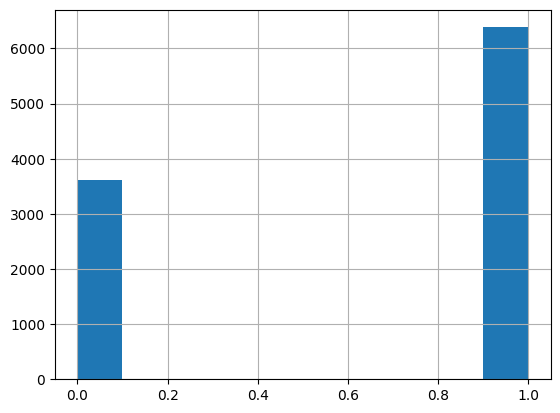

In [24]:
df['Zero Balance'].hist()

In [25]:
df.groupby(['Churn', 'Geography']).count()
# using groupby function to check the churn based on geography
# Similarly, we can use multiple groupby functions to check the hypothesis

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

# **Define label X and features y**

In [26]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [27]:
X = df.drop(['Surname', 'Churn'], axis=1)
# as surname has no predictive power

In [28]:
y = df['Churn']

In [29]:
X.shape, y.shape

((10000, 11), (10000,))

# **Handling Imbalance Data**

Class Ibalance is a common problem in machine learning, especially in classification problems as machine learning algorithms are designed to maximize accuracy and reduce errors. If the data set is imbalance then in such cases, just by predicting the majority class we get a pretty high accuracy, but fails to capture the minority class, which is most often the point of creating the model in the first place, like in
  1. Fraud detection
  2. Spam filtering
  3. Disease screening
  4. Online sales churn
  5. Advertising click-throughs

**Undersampling** can be defined as removing some observation of the majority class. This is done until the majority and minority class is balanced out.
Undersampling can be a good choice when you have a ton of data-think millions of rows. Bur a drawback to undersampling is that we are removing information that may be valueable.
In under-sampling, the simplest technique involves removing random records from the majority class, which can cause loss of information.
A drawback to consider when undersampling is that it can cause overfitting and poor generalization to your test set.

**Oversampling** can be defined as adding more copies to the minority class. Oversampling can be a good choice when you don't have a ton of data to work with.
The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfitting.
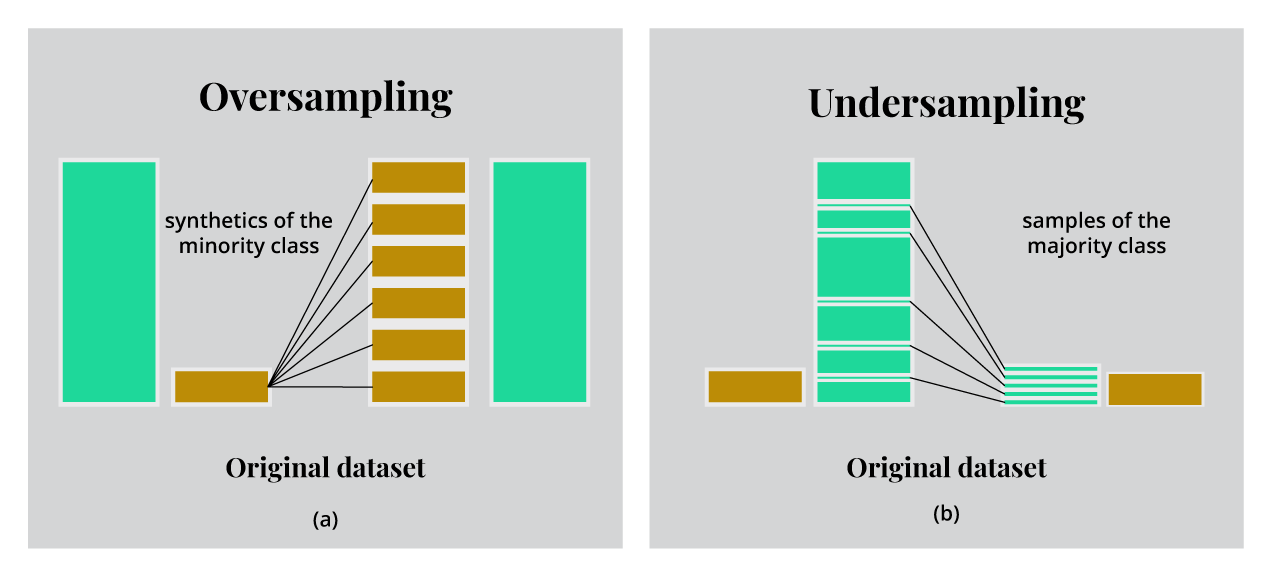

In [30]:
df['Churn'].value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

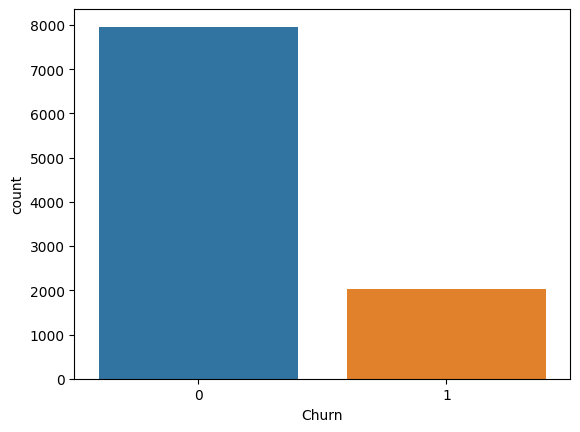

In [31]:
sns.countplot(x='Churn', data=df)

In [32]:
X.shape, y.shape

((10000, 11), (10000,))

# **Random Under Sampling**

In [33]:
from imblearn.under_sampling import RandomUnderSampler

In [34]:
rus = RandomUnderSampler(random_state=2529)

In [35]:
X_rus, y_rus = rus.fit_resample(X, y)

In [36]:
X_rus.shape, y_rus.shape, X.shape, y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [37]:
y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [38]:
y_rus.value_counts()

0    2037
1    2037
Name: Churn, dtype: int64

<Axes: ylabel='Frequency'>

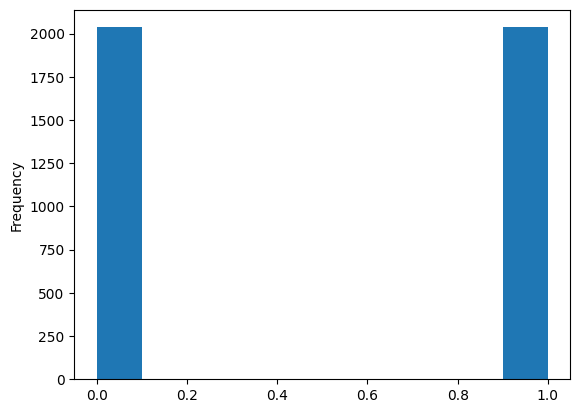

In [39]:
y_rus.plot(kind='hist')

# **Random Over Sampling**

In [40]:
from imblearn.over_sampling import RandomOverSampler

In [41]:
ros = RandomOverSampler(random_state=2529)

In [42]:
X_ros, y_ros = ros.fit_resample(X, y)

In [43]:
X_ros.shape, y_ros.shape, X.shape, y.shape

((15926, 11), (15926,), (10000, 11), (10000,))

In [44]:
y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [45]:
y_ros.value_counts()

1    7963
0    7963
Name: Churn, dtype: int64

<Axes: ylabel='Frequency'>

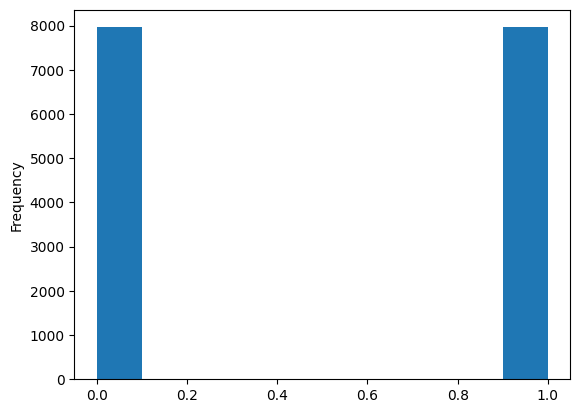

In [46]:
y_ros.plot(kind='hist')

# **Train Test Split**

In [47]:
from sklearn.model_selection import train_test_split

***Split Original Data***

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2529)

***Split Random Under Sample Data***

In [49]:
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus, test_size = 0.3, random_state = 2529)

***Split Random Over Sample Data***

In [50]:
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, test_size = 0.3, random_state = 2529)

# **Standardize Features**

Cedit score, age, tenure etc have different scales, so standardizing them.

It is best strategy to first train test split the data and then standardize.

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
sc = StandardScaler()

***Standardize Original Data***

In [53]:
X_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])


In [54]:
X_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

***Standardize Random Under Sample Data***

In [55]:
X_train_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_train_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [56]:
X_test_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_test_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

***Standardize Random Over Sample Data***

In [57]:
X_train_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_train_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [58]:
X_test_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_test_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

# **Support Vector Machine Classifier for Original Data**

In [59]:
from sklearn.svm import SVC

In [60]:
svc = SVC()

In [61]:
svc.fit(X_train, y_train)

SVC()

In [62]:
y_pred = svc.predict(X_test)

# **Model Accuracy with Original Data**

In [63]:
from sklearn.metrics import confusion_matrix, classification_report

In [64]:
confusion_matrix(y_test, y_pred)

array([[2381,   33],
       [ 436,  150]])

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2414
           1       0.82      0.26      0.39       586

    accuracy                           0.84      3000
   macro avg       0.83      0.62      0.65      3000
weighted avg       0.84      0.84      0.81      3000



Here 84% is overall accuracy (f-1 score X accuracy) is very good. But here in classification there is an issue. Our category of interest is to see the people leaving the bank whose recall is low 0.26. Therefore, our model is not good of predicting churning because of imbalanced data.

So, try hyperparameter tunning to check whether there is any improvement possible without treating for imbalance.

***Hyperparameter Tunning***

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
param_grid = {'C':[0, 1, 1, 10], 'gamma':[1, 0.1, 0.01], 'kernel':['rbf'], 'class_weight':['balanced']}

In [68]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=2)
grid.fit(X_train, y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
[CV] END ....C=0, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ....C=0, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..C=0, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ..C=0, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .C=0, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .C=0, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.4s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.9s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.5s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.4s
[CV] END .C=1, class_weight=balanced, gamma=0.01

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
6 fits failed out of a total of 24.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 180, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_v

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0, 1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [69]:
print(grid.best_estimator_)
# below is the bets support vector classifier which we got from gridSearchCV

SVC(C=10, class_weight='balanced', gamma=1)


In [70]:
grid_predictions = grid.predict(X_test)

In [71]:
confusion_matrix(y_test, grid_predictions)

array([[2159,  255],
       [ 343,  243]])

In [72]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      2414
           1       0.49      0.41      0.45       586

    accuracy                           0.80      3000
   macro avg       0.68      0.65      0.66      3000
weighted avg       0.79      0.80      0.79      3000



Here although the overall accuracy is 80% less than the previous (86%) but this model is better than previous one as it is better in predicting the churn.

# **SVC for Model with Random Under Sampling**

In [73]:
svc_rus = SVC()

In [74]:
svc_rus.fit(X_train_rus, y_train_rus)

SVC()

In [75]:
y_pred_rus = svc_rus.predict(X_test_rus)

# **Model Accuracy of Random Under Sample Model**

In [76]:
confusion_matrix(y_test_rus, y_pred_rus)

array([[470, 157],
       [174, 422]])

In [77]:
print(classification_report(y_test_rus, y_pred_rus))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       627
           1       0.73      0.71      0.72       596

    accuracy                           0.73      1223
   macro avg       0.73      0.73      0.73      1223
weighted avg       0.73      0.73      0.73      1223



***Hyperparamater Tunning***

In [78]:
param_grid = {'C':[0, 1, 1, 10], 'gamma':[1, 0.1, 0.01], 'kernel':['rbf'], 'class_weight':['balanced']}

In [79]:
grid_rus = GridSearchCV(SVC(), param_grid, refit = True, verbose = 2, cv=2)
grid_rus.fit(X_train_rus, y_train_rus)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
[CV] END ....C=0, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ....C=0, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..C=0, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ..C=0, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .C=0, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .C=0, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.01

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
6 fits failed out of a total of 24.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 180, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_v

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0, 1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [80]:
print(grid_rus.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=0.1)


In [81]:
grid_predictions_rus = grid_rus.predict(X_test_rus)

In [82]:
confusion_matrix(y_test_rus, grid_predictions_rus)

array([[476, 151],
       [172, 424]])

In [83]:
print(classification_report(y_test_rus, grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.73      0.76      0.75       627
           1       0.74      0.71      0.72       596

    accuracy                           0.74      1223
   macro avg       0.74      0.74      0.74      1223
weighted avg       0.74      0.74      0.74      1223



# **SVC for Model with Random Over Sampling**

In [84]:
svc_ros = SVC()

In [85]:
svc_ros.fit(X_train_ros, y_train_ros)

SVC()

In [86]:
y_pred_ros = svc_ros.predict(X_test_ros)

# **Model Accuracy of Random Over Sample Model**

In [87]:
confusion_matrix(y_test_ros, y_pred_ros)

array([[1823,  556],
       [ 626, 1773]])

In [88]:
print(classification_report(y_test_ros, y_pred_ros))

              precision    recall  f1-score   support

           0       0.74      0.77      0.76      2379
           1       0.76      0.74      0.75      2399

    accuracy                           0.75      4778
   macro avg       0.75      0.75      0.75      4778
weighted avg       0.75      0.75      0.75      4778



***Hyperparameter Tunning***

In [89]:
param_grid = {'C':[0, 1, 1, 10], 'gamma':[1, 0.1, 0.01], 'kernel':['rbf'], 'class_weight':['balanced']}

In [90]:
grid_ros = GridSearchCV(SVC(), param_grid, refit = True, verbose = 2, cv=2)
grid_ros.fit(X_train_ros, y_train_ros)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
[CV] END ....C=0, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ....C=0, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..C=0, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ..C=0, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .C=0, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .C=0, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.7s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.1s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.5s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.4s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.8s
[CV] END .C=1, class_weight=balanced, gamma=0.01

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
6 fits failed out of a total of 24.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 180, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_v

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0, 1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [91]:
print(grid_ros.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [92]:
grid_predictions_ros = grid_ros.predict(X_test_ros)

In [93]:
confusion_matrix(y_test_ros, grid_predictions_ros)

array([[2047,  332],
       [  68, 2331]])

In [94]:
print(classification_report(y_test_ros, grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      2379
           1       0.88      0.97      0.92      2399

    accuracy                           0.92      4778
   macro avg       0.92      0.92      0.92      4778
weighted avg       0.92      0.92      0.92      4778



# **Comparative Result**

In [95]:
#Model with Original Data
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2414
           1       0.82      0.26      0.39       586

    accuracy                           0.84      3000
   macro avg       0.83      0.62      0.65      3000
weighted avg       0.84      0.84      0.81      3000



In [96]:
# Model with Original Data ( Hyperparameter Tunnning )
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      2414
           1       0.49      0.41      0.45       586

    accuracy                           0.80      3000
   macro avg       0.68      0.65      0.66      3000
weighted avg       0.79      0.80      0.79      3000



In [97]:
# Random Under Sample Model
print(classification_report(y_test_rus, y_pred_rus))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       627
           1       0.73      0.71      0.72       596

    accuracy                           0.73      1223
   macro avg       0.73      0.73      0.73      1223
weighted avg       0.73      0.73      0.73      1223



In [98]:
# Random Under Sample Model ( Hyperparameter Tunnning )
print(classification_report(y_test_rus, grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.73      0.76      0.75       627
           1       0.74      0.71      0.72       596

    accuracy                           0.74      1223
   macro avg       0.74      0.74      0.74      1223
weighted avg       0.74      0.74      0.74      1223



In [99]:
# Random Over Sample Model
print(classification_report(y_test_ros, y_pred_ros))

              precision    recall  f1-score   support

           0       0.74      0.77      0.76      2379
           1       0.76      0.74      0.75      2399

    accuracy                           0.75      4778
   macro avg       0.75      0.75      0.75      4778
weighted avg       0.75      0.75      0.75      4778



In [101]:
# Random Over Sample Model ( Hyperparameter Tunnning )
print(classification_report(y_test_ros, grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      2379
           1       0.88      0.97      0.92      2399

    accuracy                           0.92      4778
   macro avg       0.92      0.92      0.92      4778
weighted avg       0.92      0.92      0.92      4778



The tuned model of ROS gives the highest accuracy not only by using random over sampling but by using standardization, preprocessing, proper encoding of data and adopting good hyperparameter tunning.

Therefore, we should not jump directly to another model. First use the proper data encoding, preprocessing, data manipulation, hyperparameter tunning.

Now, to further increase or to check we can use the other models life ForestClassifier, naive-based or KNN.

But always remember, in real world problem it is always the data preprocessing which always take the lead and before we actually change the model.